In [181]:
import requests
import json
from pprint import pprint
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [182]:
#Combine all csv's into one dataframe 
csv_list = ["df_78745.csv","df_78705.csv","df_78729","df_78732.csv","df_78702.csv"]
list_df = []
for file in csv_list:
    list_df.append(pd.read_csv(file))
merged_df = pd.concat(list_df)
#Get rid of unnecessary columns
del merged_df["Unnamed: 0"]
#Rename columns
merged_df.columns = ["Zip Code", "Property Type", "Sqaure Feet",  "Market Value", "Year Built"]
merged_df

,Zip Code,Property Type,Sqaure Feet,Market Value,Year Built
0,78745,RESIDENTIAL ACREAGE,0,24275,0
1,78745,TYPE UNKNOWN,0,80000,0
2,78745,RESIDENTIAL ACREAGE,3900,2240000,1979
3,78745,COMMON AREA,12120,908619,1985
4,78745,COMMON AREA,6825,3238978,2001
...,...,...,...,...,...
995,78702,SFR,2290,614293,1935
996,78702,COMMON AREA,12804,1979201,1951
997,78702,SFR,804,522609,1927
998,78702,SFR,1282,416124,1949


In [183]:
#Dont forget to get rid of zeros in the data before completing your data analysis 

merged_df_cleaned = merged_df.loc[merged_df["Sqaure Feet"] != 0,:]
merged_df_cleaned = merged_df_cleaned.loc[merged_df_cleaned["Market Value"] !=0,:]
merged_df_cleaned = merged_df_cleaned.loc[merged_df_cleaned["Year Built"]!=0,:]

#merged_df_cleaned=merged_df.dropna()
merged_df_cleaned

,Zip Code,Property Type,Sqaure Feet,Market Value,Year Built
2,78745,RESIDENTIAL ACREAGE,3900,2240000,1979
3,78745,COMMON AREA,12120,908619,1985
4,78745,COMMON AREA,6825,3238978,2001
5,78745,COMMON AREA,65800,7478809,2009
6,78745,COMMON AREA,12120,1144169,1985
...,...,...,...,...,...
995,78702,SFR,2290,614293,1935
996,78702,COMMON AREA,12804,1979201,1951
997,78702,SFR,804,522609,1927
998,78702,SFR,1282,416124,1949


In [184]:
#filtering the data to limit the dataframe to ones that we are intersetd in 

limited = merged_df_cleaned.loc[merged_df_cleaned['Property Type'].isin(['SFR','DUPLEX','CONDOMINIUM'])]
limited


,Zip Code,Property Type,Sqaure Feet,Market Value,Year Built
30,78745,DUPLEX,1872,184570,1948
40,78745,SFR,1491,236137,1976
41,78745,DUPLEX,2837,368992,1980
42,78745,DUPLEX,1731,329841,1980
43,78745,SFR,1950,310400,1976
...,...,...,...,...,...
994,78702,SFR,1557,402961,1995
995,78702,SFR,2290,614293,1935
997,78702,SFR,804,522609,1927
998,78702,SFR,1282,416124,1949


In [185]:
##Find count of each property type, what property types are most popular?


#group by data by zipcode and property type
df_combined = limited.groupby(["Zip Code", "Property Type"])
#count all of the data in each property 
df_combined_count = df_combined.count()["Sqaure Feet"]



df_combined_count

Zip Code  Property Type
78702     CONDOMINIUM      105
          DUPLEX            14
          SFR              599
78705     CONDOMINIUM      661
          DUPLEX            25
          SFR               90
78729     CONDOMINIUM      146
          DUPLEX            75
          SFR              630
78732     CONDOMINIUM        9
          DUPLEX             1
          SFR              856
78745     CONDOMINIUM       43
          DUPLEX            15
          SFR              767
Name: Sqaure Feet, dtype: int64

In [186]:
df_78702 = limited.loc[ limited["Zip Code"]==78702]
sr_78702 = df_78702["Property Type"].value_counts()

df_78705 = limited.loc[ limited["Zip Code"]==78705]
sr_78705 = df_78705["Property Type"].value_counts()

df_78729 = limited.loc[ limited["Zip Code"]==78729]
sr_78729 = df_78729["Property Type"].value_counts()

df_78732 = limited.loc[ limited["Zip Code"]==78732]
sr_78732 = df_78732["Property Type"].value_counts()

df_78745 = limited.loc[ limited["Zip Code"]==78745]
sr_78745 = df_78745["Property Type"].value_counts()



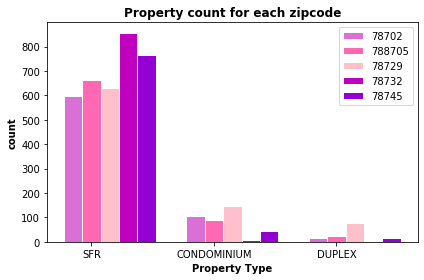

In [190]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.15
 
# set height of bar
bars1 = sr_78702
bars2 = sr_78705
bars3 = sr_78729
bars4 = sr_78732
bars5 = sr_78745

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

 
# Make the plot
plt.bar(r1, bars1, color='orchid', width=barWidth, edgecolor='white', label='78702')
plt.bar(r2, bars2, color='hotpink', width=barWidth, edgecolor='white', label='788705')
plt.bar(r3, bars3, color='pink', width=barWidth, edgecolor='white', label='78729')
plt.bar(r4, bars4, color='m', width=barWidth, edgecolor='white', label='78732')
plt.bar(r5, bars5, color='darkviolet', width=barWidth, edgecolor='white', label='78745')

# Add xticks on the middle of the group bars
plt.xlabel('Property Type', fontweight='bold')
plt.ylabel('count', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['SFR', 'CONDOMINIUM', 'DUPLEX'])
plt.title("Property count for each zipcode",fontweight='bold')



plt.tight_layout()

# Create legend & Show graphic
plt.legend()

#export the graph as a png
plt.savefig('property_count.png')
plt.show()


In [193]:
limited

,Zip Code,Property Type,Sqaure Feet,Market Value,Year Built
30,78745,DUPLEX,1872,184570,1948
40,78745,SFR,1491,236137,1976
41,78745,DUPLEX,2837,368992,1980
42,78745,DUPLEX,1731,329841,1980
43,78745,SFR,1950,310400,1976
...,...,...,...,...,...
994,78702,SFR,1557,402961,1995
995,78702,SFR,2290,614293,1935
997,78702,SFR,804,522609,1927
998,78702,SFR,1282,416124,1949


In [216]:
# add Marketvalue_sqaurefeet to all of the data frame to see if we can get something valuable 


Marketvalue_sqaurefeet = limited["Market Value"]/limited["Sqaure Feet"]
limited["Market Value per Sqaure Feet"] = Marketvalue_sqaurefeet

#78705
Marketvalue_sqaurefeet = df_78705["Market Value"]/df_78705["Sqaure Feet"]
df_78705["Market Value per Sqaure Feet"] = Marketvalue_sqaurefeet

#78729
Marketvalue_sqaurefeet = df_78729["Market Value"]/df_78729["Sqaure Feet"]
df_78729["Market Value per Sqaure Feet"] = Marketvalue_sqaurefeet

#78702
Marketvalue_sqaurefeet = df_78702["Market Value"]/df_78702["Sqaure Feet"]
df_78702["Market Value per Sqaure Feet"] = Marketvalue_sqaurefeet

#78745
Marketvalue_sqaurefeet = df_78745["Market Value"]/df_78745["Sqaure Feet"]
df_78745["Market Value per Sqaure Feet"] = Marketvalue_sqaurefeet

#78732
Marketvalue_sqaurefeet = df_78732["Market Value"]/df_78732["Sqaure Feet"]
df_78732["Market Value per Sqaure Feet"] = Marketvalue_sqaurefeet



C:\Users\hashe\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\hashe\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\hashe\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

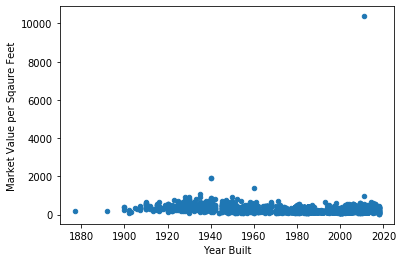

In [210]:
limited.plot.scatter("Year Built", "Market Value per Sqaure Feet")

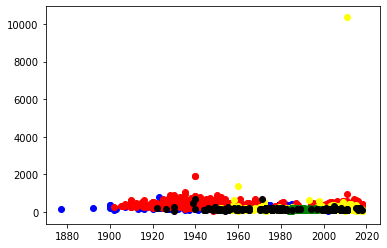

In [233]:
ax = plt.gca()

ax.scatter(df_78705["Year Built"], df_78705["Market Value per Sqaure Feet"], color="b")
ax.scatter(df_78702["Year Built"], df_78702["Market Value per Sqaure Feet"], color="r")
ax.scatter(df_78732["Year Built"], df_78732["Market Value per Sqaure Feet"], color="yellow")
ax.scatter(df_78729["Year Built"], df_78729["Market Value per Sqaure Feet"], color="Green")
ax.scatter(df_78745["Year Built"], df_78745["Market Value per Sqaure Feet"], color="black")







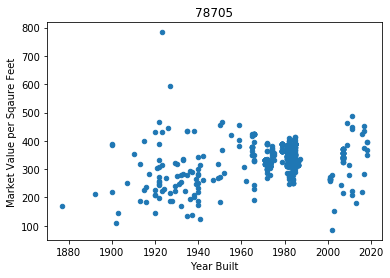

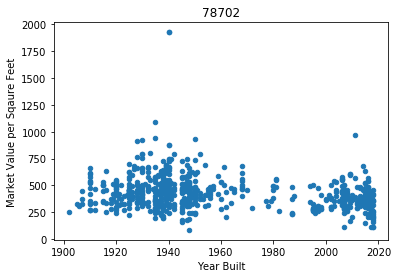

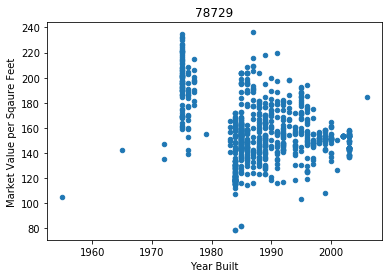

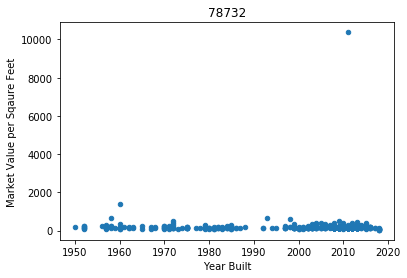

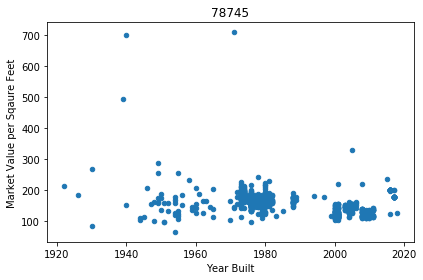

In [245]:

scatter_78705 = df_78705.plot.scatter("Year Built", "Market Value per Sqaure Feet",title ="78705")
scatter_78702 = df_78702.plot.scatter("Year Built", "Market Value per Sqaure Feet", title ="78702")
scatter_78729 = df_78729.plot.scatter("Year Built", "Market Value per Sqaure Feet", title ="78729")
scatter_78732 = df_78732.plot.scatter("Year Built", "Market Value per Sqaure Feet", title ="78732")
scatter_78745 = df_78745.plot.scatter("Year Built", "Market Value per Sqaure Feet", title ="78745")


plt.tight_layout()


plt.savefig('marketvaluepersqurefeet_year.png')




